# Chicago Crime Data exploration

In [6]:
# Import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

In [7]:
# Download the dataset
df = pd.read_csv('Crimes_-_2001_to_Present.csv')
# Shape
df.shape

/var/folders/3s/cgrsx4g95wjdn79jcq00sl7r0000gn/T/ipykernel_14239/789632955.py:2: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Crimes_-_2001_to_Present.csv')


(7633243, 22)

In [141]:
# First five rows
display(df.head())
# Columns names
display(df.columns)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

For the better observation columns and decide which columns I want to pick for further exploration, I divided this dataframe into two parts. By subsetting 'df1' with first half of columns, 'df2' with second half. 

In [142]:
# Divide dataframe into two parts

# df1 columns from 0 to 10
df1 = df.iloc[:,0:11]

# df2 columns from 11 to 22
df2 = df.iloc[:,11:]

display(df1.columns)
display(df2.columns)

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat'],
      dtype='object')

Index(['District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [143]:
display(df1.head())
display(df2.head())

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522


,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


I decided to remove columns: 'ID', 'Case Number', 'Block', 'IUCR', 'Description', 'Location Description','Beat', 'Ward', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Updated On' and 'Location'. Because either some of them are not statistically informative or require a certain understanding which I don't have, FBI code is for example.

In [144]:
# Remove columns 

df = df.drop(['ID', 'Case Number', 'Block', 'IUCR', 'Description', 'Location Description', 
              'Beat', 'Ward', 'FBI Code',  'X Coordinate', 'Y Coordinate', 'Updated On', 'Location'], axis=1)

df.head()

,Date,Primary Type,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
0,09/05/2015 01:30:00 PM,BATTERY,False,True,9.0,61.0,2015,41.815117,-87.670000
1,09/04/2015 11:30:00 AM,THEFT,False,False,15.0,25.0,2015,41.895080,-87.765400
2,09/01/2018 12:01:00 AM,THEFT,False,True,6.0,44.0,2018,NaN,NaN
3,09/05/2015 12:45:00 PM,NARCOTICS,True,False,14.0,21.0,2015,41.937406,-87.716650
4,09/05/2015 01:00:00 PM,ASSAULT,False,True,15.0,25.0,2015,41.881903,-87.755121


Since some clumn names have spaces or capital letter, I wanted to rename them for more convenient usage

In [145]:
df.rename(columns = {'Date':'date', 'Primary Type':'primary_type',
                     'Arrest':'arrest','Domestic':'domestic','District':'district',
                     'Community Area':'community_area', 'Year':'year',
                     'Latitude':'latitude','Longitude':'longitude'}, inplace = True)

df.columns

Index(['date', 'primary_type', 'arrest', 'domestic', 'district',
       'community_area', 'year', 'latitude', 'longitude'],
      dtype='object')

In [146]:
# Unique values

# primary_type 
print('--PRIMARY TYPE--')
display(df.primary_type.unique())
# arrest 
print('--ARREST--')
display(df.arrest.unique())
# domestic 
print('--DOMESTIC--')
display(df.domestic.unique())
# district 
print('--DISTRICT--')
display(df.district.unique())
# community_area 
print('--COMMUNITY AREA--')
display(df.community_area.unique())
# year 
print('--YEAR--')
display(df.year.sort_values().unique())

--PRIMARY TYPE--


array(['BATTERY', 'THEFT', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'CRIMINAL DAMAGE',
       'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'MOTOR VEHICLE THEFT',
       'SEX OFFENSE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION',
       'PROSTITUTION', 'GAMBLING', 'CRIM SEXUAL ASSAULT',
       'LIQUOR LAW VIOLATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON',
       'STALKING', 'KIDNAPPING', 'INTIMIDATION',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON - CRIMINAL',
       'HUMAN TRAFFICKING', 'OBSCENITY', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'HOMICIDE',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM',
       'DOMESTIC VIOLENCE'], dtype=object)

--ARREST--


array([False,  True])

--DOMESTIC--


array([ True, False])

--DISTRICT--


array([ 9., 15.,  6., 14., 10., 12.,  8., 16.,  5.,  2.,  4., 22.,  3.,
        1.,  7., 11., 17., 20., 25., 18., 19., 24., 31., nan, 21.])

--COMMUNITY AREA--


array([61., 25., 44., 21., 71., 24., 31., 27., 63., 65., 11., 49., 39.,
       51., 15., 52., 12., 43., 46., 32., 68., 14., 29.,  2., 69., 23.,
       35.,  8.,  3.,  6., 56., 28., 53., 50., 33., 13., 74., 19., 45.,
       72., 22., 64.,  7.,  5., 26., 66., 59., 77.,  1., 10., 67., 38.,
       41., 60., 30., 54., 58., 48., 73., 70., 40., 34., 16., 18.,  4.,
       17., 42., 37., 75., 62., 20., 57., 76., 47., nan,  9., 36., 55.,
        0.])

--YEAR--


array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

Strangely values in 'community_area' are float

In [147]:
# Check for NA values
display(df.isna().any())
display(df.info())

date              False
primary_type      False
arrest            False
domestic          False
district           True
community_area     True
year              False
latitude           True
longitude          True
dtype: bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7633243 entries, 0 to 7633242
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   primary_type    object 
 2   arrest          bool   
 3   domestic        bool   
 4   district        float64
 5   community_area  float64
 6   year            int64  
 7   latitude        float64
 8   longitude       float64
dtypes: bool(2), float64(4), int64(1), object(2)
memory usage: 422.2+ MB


None

## Questions to answer

- Which year was the most/least dangerous?
- Which police district tends to perform most arrests?
- Which community area has the highest crime rate?
- Is there are correlation between community area and police district?

In [148]:
df['primary_type'].value_counts()

THEFT                                1609611
BATTERY                              1399395
CRIMINAL DAMAGE                       870089
NARCOTICS                             743968
ASSAULT                               495117
OTHER OFFENSE                         474898
BURGLARY                              419840
MOTOR VEHICLE THEFT                   356425
DECEPTIVE PRACTICE                    333636
ROBBERY                               286573
CRIMINAL TRESPASS                     211635
WEAPONS VIOLATION                     101600
PROSTITUTION                           69678
OFFENSE INVOLVING CHILDREN             54399
PUBLIC PEACE VIOLATION                 51884
SEX OFFENSE                            29894
CRIM SEXUAL ASSAULT                    27709
INTERFERENCE WITH PUBLIC OFFICER       18106
LIQUOR LAW VIOLATION                   14782
GAMBLING                               14616
ARSON                                  12992
HOMICIDE                               12165
KIDNAPPING

<AxesSubplot: xlabel='domestic', ylabel='count'>

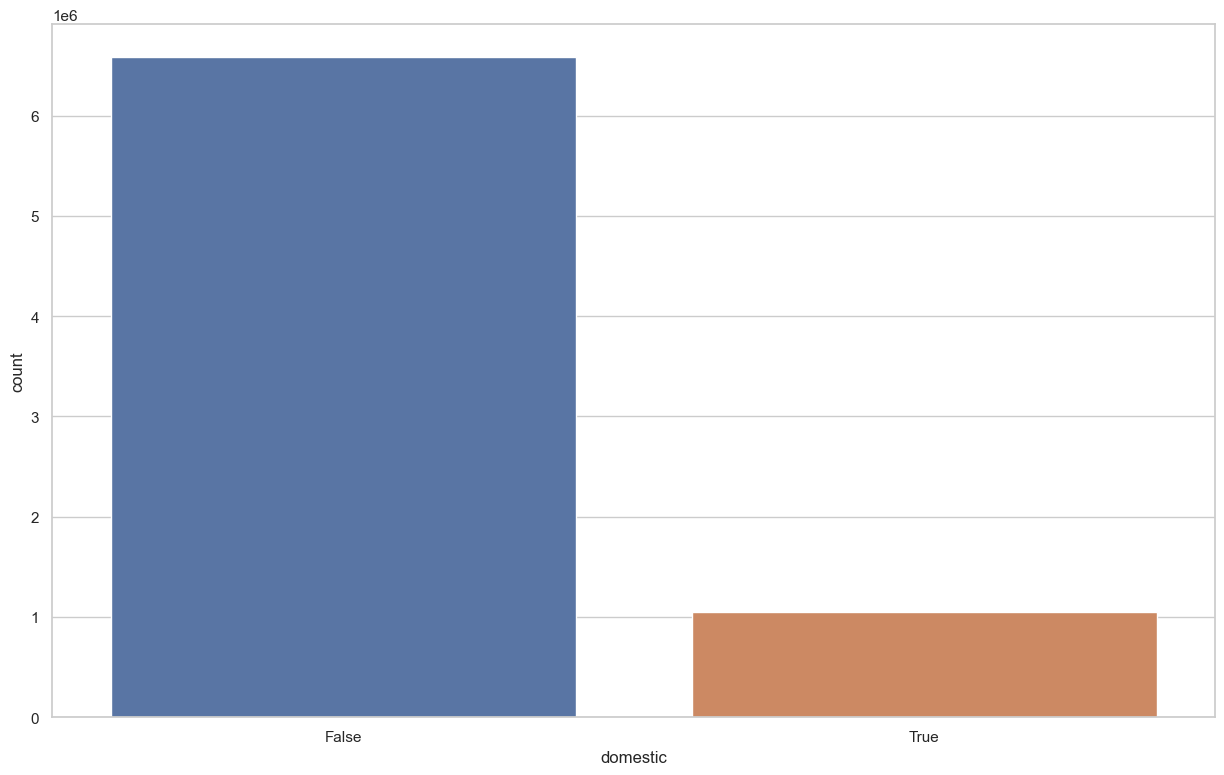

In [149]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df['domestic'])

Majority of crimes aren't domestically related

## Pie Chart

### Crimes of 2016 to 2022

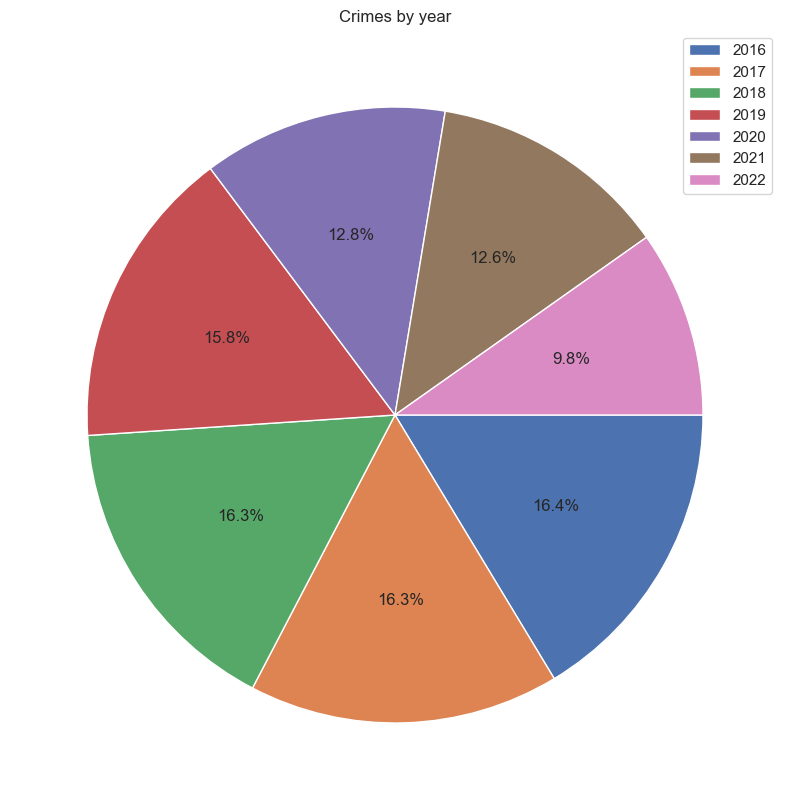

In [150]:
years = df[df['year'].isin([i for i in range (2016, 2023)])]
years = years['year'].value_counts().rename_axis('year').reset_index(name='counts')

col = years['year'][:11]
 
data = years['counts']
 
# Creating plot
fig = plt.figure(figsize =(18, 10))
plt.pie(data, counterclock = False, autopct='%1.1f%%')
plt.legend(col)
plt.title('Crimes by year')
# show plot
plt.show()

From pie chart we can see that starting from 2016 up to today (2022), crime rate has been  decreasing by constant. If in 2016 the percent of crime rate was 16.4%, today it is 9.8%. 

### Which police district does most arrests?

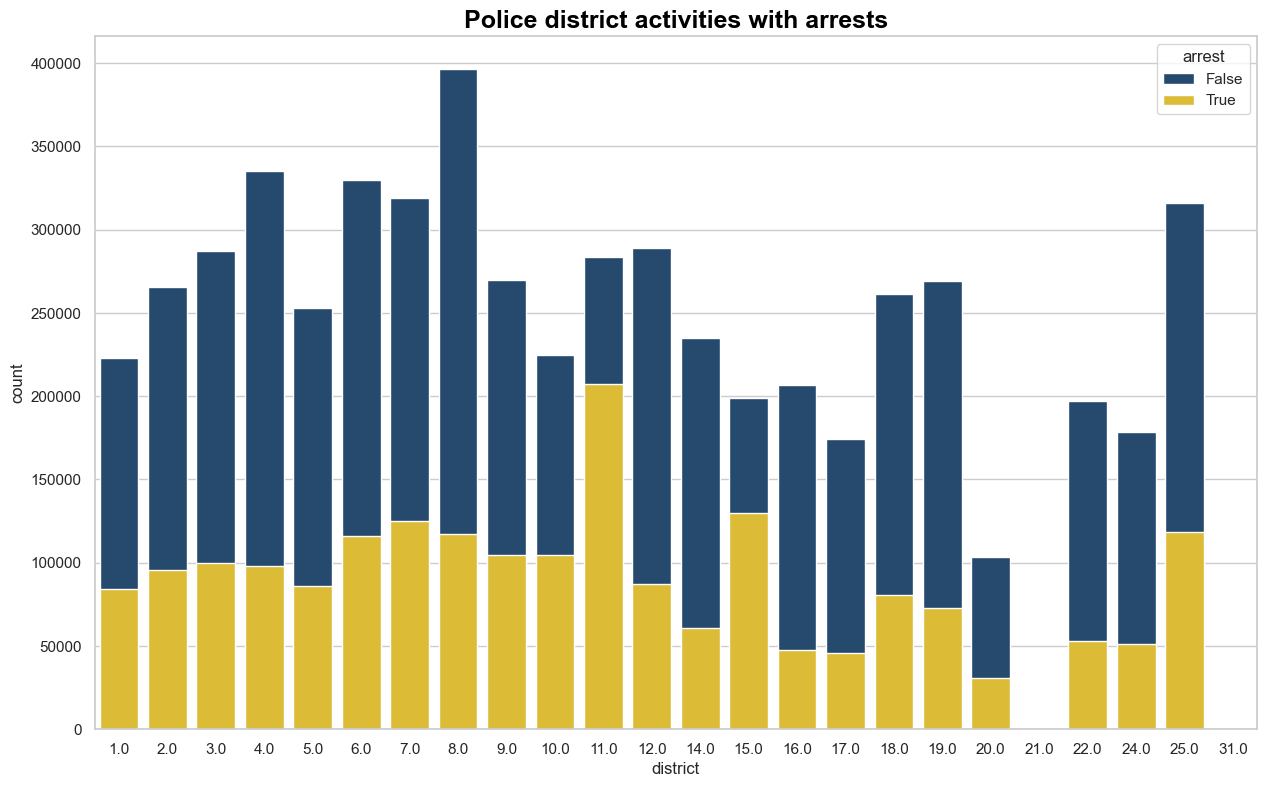

In [151]:
palette = ('#194a7a', '#f8cc1b')
ax = sns.countplot(x=df['district'],hue=df['arrest'], dodge = False, palette=palette)
ax.set_title('Police district activities with arrests', fontsize=18, 
             fontweight='bold', color='black')
sns.set(rc={'figure.figsize':(15,9)})

11th and 15th police police districts have highest arrest rate

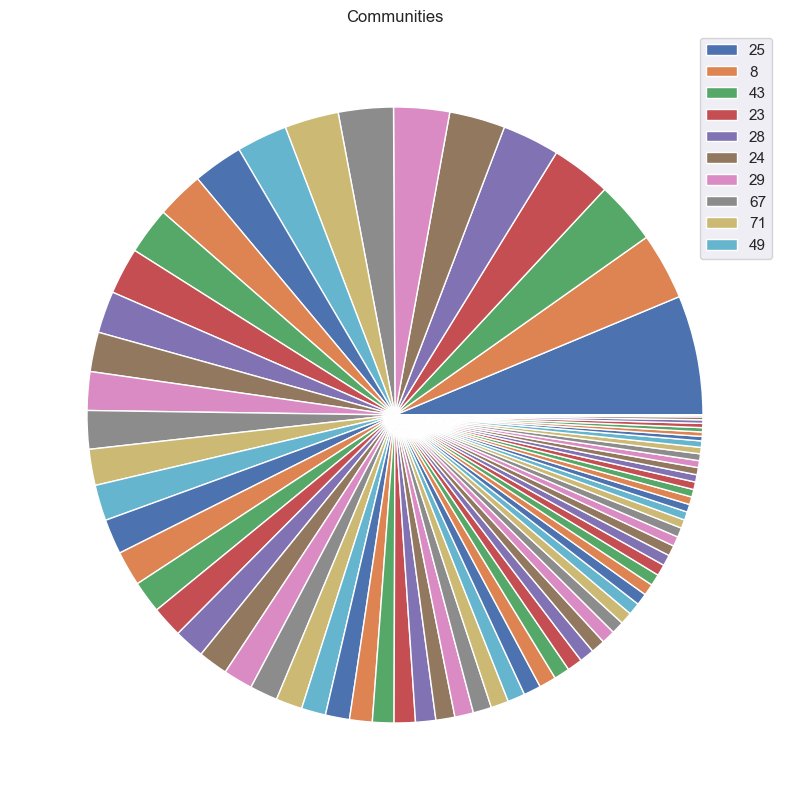

25.0    440816
8.0     246445
43.0    231124
23.0    219987
28.0    210888
         ...  
55.0     15461
12.0     12941
47.0     10519
9.0       6946
0.0         76
Name: community_area, Length: 78, dtype: int64

In [152]:
community = df['community_area'].value_counts().rename_axis('area').reset_index(name='counts')

col = community['area'].astype(int)
 
data = community['counts']
 
# Creating plot
fig = plt.figure(figsize =(18, 10))
plt.pie(data, counterclock = True)
plt.legend(col[:10])
plt.title('Communities')
# show plot
plt.show()

display(df['community_area'].astype(int, errors='ignore').value_counts())

Because "community_areas" has too many different labels, this pie chart is hard to read. I decided to plot countplot of only 20 most criminal communities. 

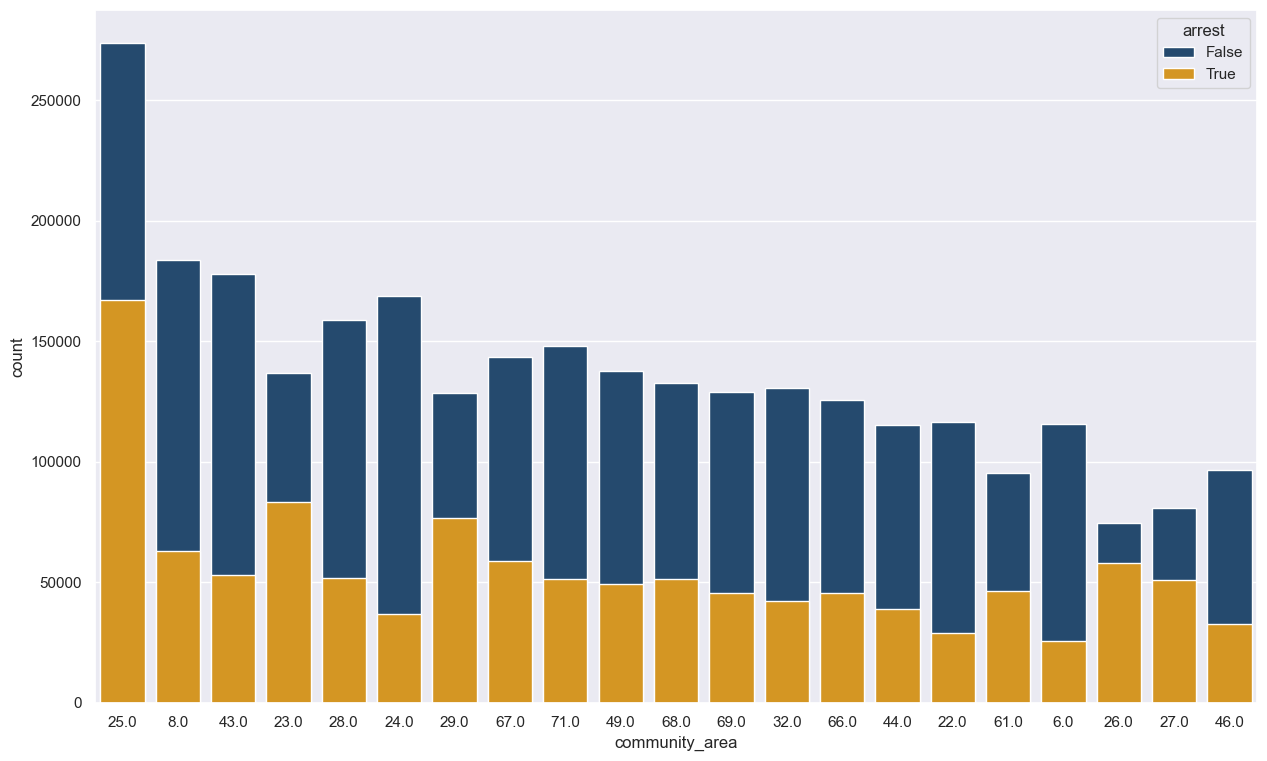

In [153]:
palette = ('#194a7a', '#f29f05')
ax = sns.countplot(x=df['community_area'], 
                   order=pd.value_counts(df['community_area']).iloc[:21].index, 
                   hue=df['arrest'], dodge=False, palette=palette)
sns.set(rc={'figure.figsize':(15,9)})

And we can see that community area 25 also known as Austin, has the highest crime rate, and therefore highest rate of arrests. 

First I thought there could be some correlation between "community_area" and "district". So I decided to check it out.

In [154]:
df.corr()

/var/folders/3s/cgrsx4g95wjdn79jcq00sl7r0000gn/T/ipykernel_11620/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,arrest,domestic,district,community_area,year,latitude,longitude
arrest,1.000000,-0.068222,-0.017092,-0.001313,-0.095491,0.000393,-0.031904
domestic,-0.068222,1.000000,-0.041744,0.077558,0.065692,-0.080655,0.006002
district,-0.017092,-0.041744,1.000000,-0.494538,-0.005987,0.628299,-0.536689
community_area,-0.001313,0.077558,-0.494538,1.000000,-0.013004,-0.753330,0.241905
year,-0.095491,0.065692,-0.005987,-0.013004,1.000000,-0.003057,0.005592
latitude,0.000393,-0.080655,0.628299,-0.753330,-0.003057,1.000000,-0.454703
longitude,-0.031904,0.006002,-0.536689,0.241905,0.005592,-0.454703,1.000000


However it shows negative correlation, -50%. Therefore I did a small research by comparing on the map, location of community area 25 and location of 11th and 15th police districts.

As I expcted high arrest rate is caused by high crime rate of a community area, and whichever police district located near by will have the highest arrest rate among other districts. 

You can see it yourself by putting these maps next to each other.

Community areas: https://en.wikipedia.org/wiki/Austin,_Chicago#/media/File:US-IL-Chicago-CA25.svg 

Police districts: https://cdn.vox-cdn.com/thumbor/N8H3RVwbDqCkJjNYMlzavhXU6Dg=/1400x0/filters:no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/16109277/cpdpersonnelbydistrict.jpg

<AxesSubplot: xlabel='year', ylabel='count'>

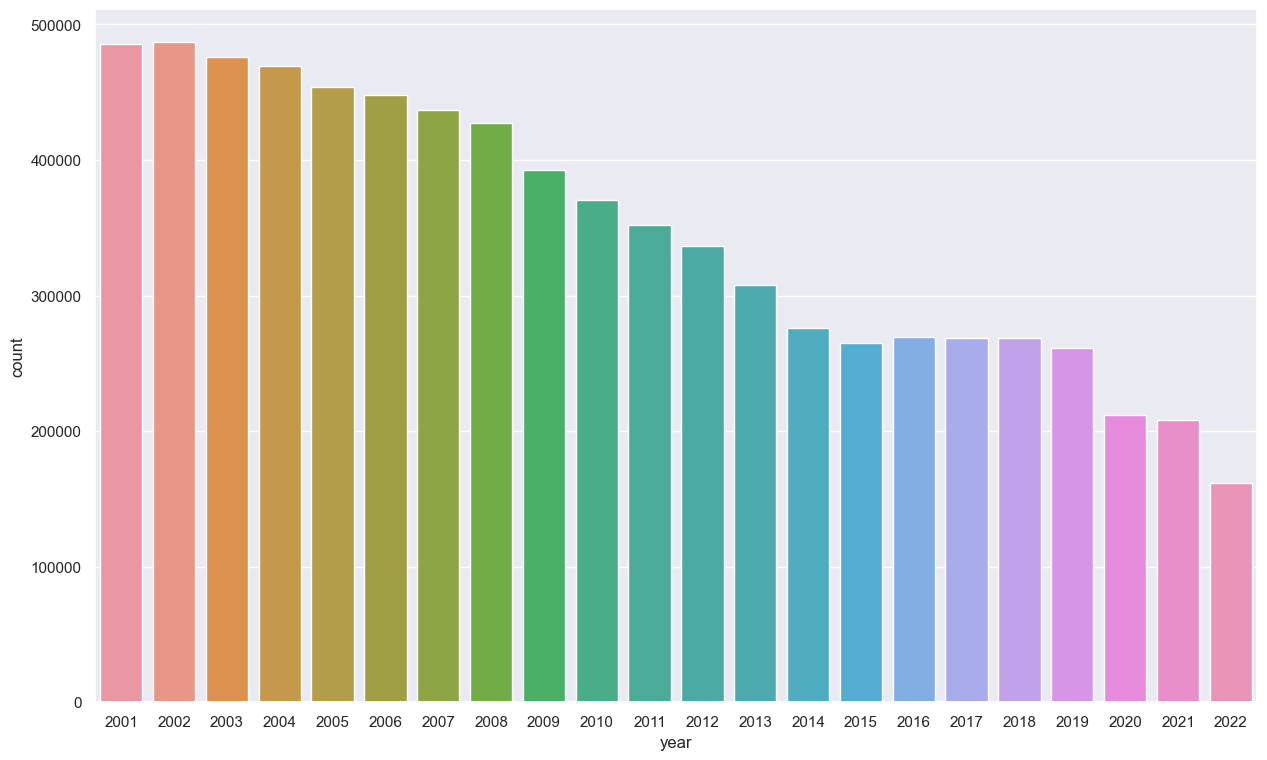

In [160]:
sns.countplot(x=df['year'])

Looks like 2002nd was the most criminal year over the time. However crime rate has been constantly reducing from 2001 up 2013. It stayed relatively same during the period of 2014 to 2019. At the moment, 2022 has lowest crime rate over the history of data.